# Proyecto EDA (Tienda)

In [10]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = None

In [25]:
super= pd.read_csv(r'C:\Users\Dell\Sample - Superstore.csv', encoding = 'windows-1252')
super.head()


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [26]:

#Informacion de nuestra base de datos: Filas,cantidad de variables y tipo de variables
super.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [28]:
super['Order Date'] = super['Order Date'].astype('datetime64[ns]')
super['Ship Date'] = super['Ship Date'].astype('datetime64[ns]')

In [29]:
#Checar si el formato de la fecha de la orden es correcta
print(super['Order Date'][0])
print(super['Order Date'][0].year , " " , super['Order Date'][0].month ," " ,super['Order Date'][0].day)

2016-11-08 00:00:00
2016   11   8


In [30]:
#Observar si hay valores nulos en nuestra base de datos
#Esto se realizo de manera manual al borrar valores nulos en nuestro archivo de Excel 
super.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [31]:
#Checar que nuestra base no tenga valores duplicados

#Esto se realizo de manera manual al borrar valores duplicados en nuestro archivo de Excel 
super.duplicated().sum()

0

In [33]:
#Aqui podemos observar el resumen estadistico de nuestra base de datos: 
#Informacion como el conteo de filas, el promedio de cada variable, desviacion estandar, valor minimo, etc..
super.describe()

,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [34]:
#Analisis exploratorio para nuestras variables categoricas para comprender mejopr como se distribuyen los datos y si hay
#algun valor atipico
cat_features = [f for f in super.columns if(super[f].dtype=='O')]
super[cat_features].describe()

,Order ID,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Region,Product ID,Category,Sub-Category,Product Name
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,4,793,793,3,1,531,49,4,1862,3,17,1850
top,CA-2017-100111,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,California,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope
freq,14,5968,37,37,5191,9994,915,2001,3203,19,6026,1523,48


In [37]:
for c in cat_features:
    print(c , ":" ,super[c].nunique())

Order ID : 5009
Ship Mode : 4
Customer ID : 793
Customer Name : 793
Segment : 3
Country : 1
City : 531
State : 49
Region : 4
Product ID : 1862
Category : 3
Sub-Category : 17
Product Name : 1850


# Analisis por producto

In [39]:
# Queremos conocer la cantidad de productos en nuestra base de datos

df['Product Name'].nunique()

1850

In [40]:
#Informacion  especifica de los 1850 productos
productos_info = super.groupby(['Product Name']).sum().reset_index()
productos_info

,Product Name,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,"""While you Were Out"" Message Book, One Form pe...",12814,192854,25.228,8,0.4,10.3880
1,"#10 Gummed Flap White Envelopes, 100/Box",14512,156773,41.300,11,0.4,16.7678
2,#10 Self-Seal White Envelopes,15053,181933,108.682,10,0.2,52.1230
3,"#10 White Business Envelopes,4 1/8 x 9 1/2",41568,314765,488.904,32,0.4,223.1408
4,"#10- 4 1/8"" x 9 1/2"" Recycled Envelopes",42673,557280,286.672,37,0.8,115.2806
...,...,...,...,...,...,...,...
1845,iKross Bluetooth Portable Keyboard + Cell Phon...,27787,276516,477.660,24,0.4,115.6440
1846,iOttie HLCRIO102 Car Mount,37162,218554,215.892,12,0.8,-11.9940
1847,iOttie XL Car Mount,15148,135526,223.888,14,0.4,-50.3748
1848,invisibleSHIELD by ZAGG Smudge-Free Screen Pro...,35685,409422,442.554,29,1.2,171.2648


### Productos menos vendidos de nuestro Mercado

In [46]:
#Clasificación de productos de los menos vendidos
ventas_info = productos_info[["Product Name" , "Sales"]].sort_values(by=['Sales'] , ascending = True)
ventas_info.head(20)

,Product Name,Sales
605,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624
208,Avery 5,5.760
1793,Xerox 20,6.480
784,Grip Seal Envelopes,7.072
253,Avery Hi-Liter Pen Style Six-Color Fluorescent...,7.700
249,Avery Hi-Liter Comfort Grip Fluorescent Highli...,7.800
1780,Xerox 1989,7.968
27,4009 Highlighters,8.040
1509,Stockwell Gold Paper Clips,8.096
1113,Newell 308,8.400


In [59]:
# Helper Function For Visualization
import matplotlib.pyplot as plt

def Viz_Bar(df1, cx, cy, t='', rot="horizontal", x=True):
    if x is False:
        plt.rcdefaults()
        fig, ax = plt.subplots()
        ax.barh(df1.head(20)[cx], df1.head(20)[cy], align='center', color=['#F05454','#30475E','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf'])
        ax.set_yticks(df1.head(20)[cx])
        ax.set_yticklabels(df1.head(20)[cx])
        ax.invert_yaxis()
        ax.set_xlabel(cy)
        ax.set_title(t)
        plt.xticks(rotation=rot)
        plt.show()
    else:
        plt.bar(df1.head(20)[cx], df1.head(20)[cy], color=['#F05454','#30475E','#1f77b4','#ff7f0e','#2ca02c','#d62728','#9467bd','#8c564b','#e377c2','#7f7f7f','#bcbd22','#17becf'])
        plt.xlabel(cx)
        plt.ylabel(cy)
        plt.title(t)
        plt.xticks(rotation=rot)
        plt.show()


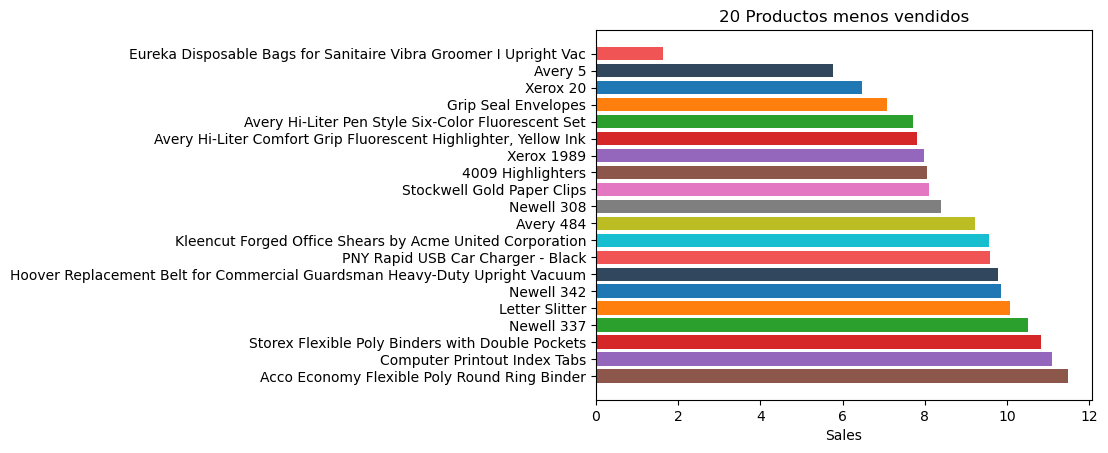

In [60]:
Viz_Bar(ventas_info, 'Product Name' , 'Sales' , '20 Productos menos vendidos' , 'horizontal' ,False)

### En nuestra grafica de barras horizontal podemos observar que los productos que menos se venden son 3:

- **Eureka Disposable Bags for Sanitaire Vibra Groomer I Upright Vac**
- **Avery 5**
- **Xerox 20**

El conocer nuestros productos menos vendidos nos podria dar una idea de como podemos enfocar nuestros esfuerzos hacia otro 
tipo de productos que se venden en mayores cantidades y que tienen mayor rotacion

In [63]:
#Clasificación de productos de los mas vendidos
Sales_info.sort_values(by=['Sales'], ascending= False).head(20)

,Product Name,Sales
404,Canon imageCLASS 2200 Advanced Copier,61599.8240
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,27453.3840
444,Cisco TelePresence System EX90 Videoconferenci...,22638.4800
786,HON 5400 Series Task Chairs for Big and Tall,21870.5760
686,GBC DocuBind TL300 Electric Binding System,19823.4790
688,GBC Ibimaster 500 Manual ProClick Binding System,19024.5000
805,Hewlett Packard LaserJet 3310 Copier,18839.6860
787,HP Designjet T520 Inkjet Large Format Printer ...,18374.8950
683,GBC DocuBind P400 Electric Binding System,17965.0680
813,High Speed Automatic Electric Letter Opener,17030.3120


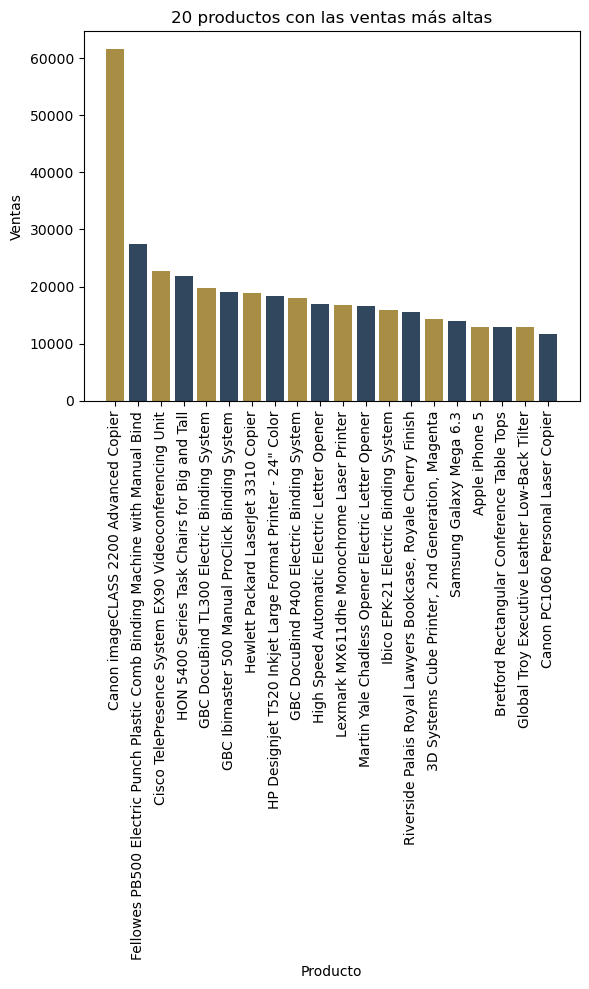

In [72]:
# Obtener los datos de ventas de los 20 productos más vendidos
top_20_sales = Sales_info.sort_values(by=['Sales'], ascending=False).head(20)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Generar el gráfico de barras verticales
ax.bar(top_20_sales['Product Name'], top_20_sales['Sales'], color=['#A78E44', '#30475E'])

# Establecer los títulos y etiquetas del gráfico
ax.set_title('20 productos con las ventas más altas')
ax.set_xlabel('Producto')
ax.set_ylabel('Ventas')

# Rotar los nombres de los productos en el eje X para facilitar su lectura
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


## Productos con mayores ganancias 

In [74]:
Profit_info = productos_info[["Product Name" ,"Profit"]].sort_values(by=['Profit'] , ascending = False)

Profit_info.head(20)

,Product Name,Profit
404,Canon imageCLASS 2200 Advanced Copier,25199.9280
650,Fellowes PB500 Electric Punch Plastic Comb Bin...,7753.0390
805,Hewlett Packard LaserJet 3310 Copier,6983.8836
400,Canon PC1060 Personal Laser Copier,4570.9347
787,HP Designjet T520 Inkjet Large Format Printer ...,4094.9766
165,Ativa V4110MDD Micro-Cut Shredder,3772.9461
19,"3D Systems Cube Printer, 2nd Generation, Magenta",3717.9714
1276,Plantronics Savi W720 Multi-Device Wireless He...,3696.2820
895,Ibico EPK-21 Electric Binding System,3345.2823
1840,Zebra ZM400 Thermal Label Printer,3343.5360


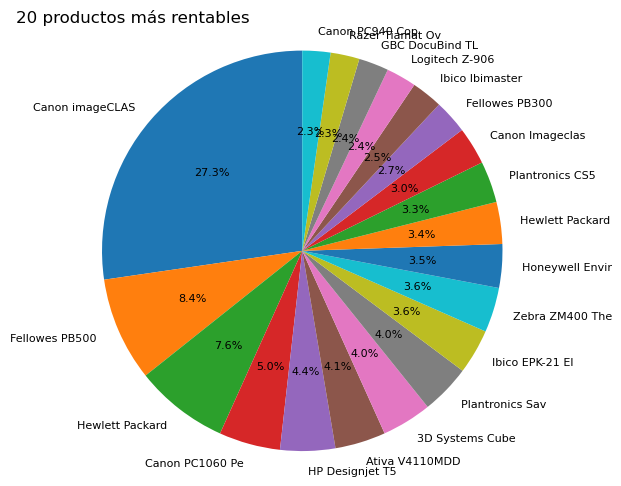

In [82]:
# Obtener los datos de ganancias de los 20 productos más rentables
Profit_info = productos_info[["Product Name", "Profit"]].sort_values(by=['Profit'], ascending=False).head(20)

# Acortar los nombres de los productos a 10 caracteres
Profit_info['Product Name'] = Profit_info['Product Name'].str.slice(0, 15)

# Crear una figura y un eje
fig, ax = plt.subplots()

# Generar el gráfico de pastel con porcentajes
ax.pie(Profit_info['Profit'], labels=Profit_info['Product Name'], autopct='%1.1f%%', startangle=90, textprops={'fontsize': 8})
plt.axis('equal')
plt.tight_layout()

# Establecer el título del gráfico
ax.set_title('20 productos más rentables', loc='left')

# Mostrar el gráfico
plt.show()


En nuestra grafica anterior podemos observar cuales son los productos mas rentables para nuestra Tienda:

El producto estrella es **Canon imageCLASS 2200 Advanced Copier** que representa el **27.3%** de nuestros ingresos

Otros productos imporantes son:
- Fellowes PB500
- Hewlett Packard
- Canon PC1060 

In [87]:
Profit_info = productos_info[["Product Name", "Profit"]].sort_values(by=['Profit'], ascending=False)
Profit_info['Product Name'] = Profit_info['Product Name'].str.slice(0, 30)

# Filtramos productos con perdidas o cero ganancias
Profit_info = Profit_info[Profit_info['Profit']<=0]

# Muestra nuestra tabla
print(Profit_info)


                        Product Name        Profit
269   Avery Trapezoid Extra Heavy Du  0.000000e+00
131   Alliance Big Bands Rubber Band  0.000000e+00
309   Belkin OmniView SE Rackmount K  0.000000e+00
767         Global Super Steno Chair -1.776357e-15
1300  Premier Electric Letter Opener -7.105427e-15
...                              ...           ...
376   Bush Advantage Collection Race -1.934398e+03
425   Chromcraft Bull-Nose Wood Oval -2.876116e+03
476   Cubify CubeX 3D Printer Triple -3.839990e+03
985   Lexmark MX611dhe Monochrome La -4.589973e+03
475   Cubify CubeX 3D Printer Double -8.879970e+03

[304 rows x 2 columns]


_**Es importante analizar  la tabla anterior pues podemos observar que hay productos que estan conllevando perdidas por lo que se deben tomar medidas necesarias para retirar o rematar esos productos pues estan afectando las ganancias totales de nuestra tienda.**_

In [88]:
df['Order ID'].nunique()

5009

In [90]:
products_details = df.copy()
products_details['Product Bundle'] = [[] for i in df.index]
#Separación de nombres de productos por una coma
products_details['Product Bundle'] = products_details.groupby("Order ID")['Product Name'].transform(lambda x : ','.join(x) )
products_details= products_details[['Order ID' , 'Product Bundle']].drop_duplicates()

products_details.head(20)

,Order ID,Product Bundle
0,CA-2016-152156,"Bush Somerset Collection Bookcase,Hon Deluxe F..."
2,CA-2016-138688,Self-Adhesive Address Labels for Typewriters b...
3,US-2015-108966,"Bretford CR4500 Series Slim Rectangular Table,..."
5,CA-2014-115812,Eldon Expressions Wood and Plastic Desk Access...
12,CA-2017-114412,Xerox 1967
13,CA-2016-161389,Fellowes PB200 Plastic Comb Binding Machine
14,US-2015-118983,Holmes Replacement Filter for HEPA Air Cleaner...
16,CA-2014-105893,"Stur-D-Stor Shelving, Vertical 5-Shelf: 72""H x..."
17,CA-2014-167164,Fellowes Super Stor/Drawer
18,CA-2014-143336,"Newell 341,Cisco SPA 501G IP Phone,Wilson Jone..."


In [92]:
from itertools import combinations
from collections import Counter

cnt = Counter()
common_products =pd.DataFrame()
for row in products_details['Product Bundle'] :
    row_list = row.split(',')
    cnt.update(Counter(combinations(row_list,2)))

#Las 15 conjuntos de productos que son comprados en conjuntamente
cnt.most_common(15)

[(('Acco Pressboard Covers with Storage Hooks', ' 14 7/8" x 11"'), 24),
 (('Acco Pressboard Covers with Storage Hooks', ' Executive Red'), 17),
 (('Adams Telephone Message Book W/Dividers/Space For Phone Numbers',
   ' 5 1/4"X8 1/2"'),
  17),
 ((' Chisel Tip', ' Yellow'), 15),
 (('Situations Contoured Folding Chairs', ' 4/Set'), 15),
 (('Global High-Back Leather Tilter', ' Burgundy'), 14),
 (("Global Wood Trimmed Manager's Task Chair", ' Khaki'), 14),
 (('Global Leather Highback Executive Chair with Pneumatic Height Adjustment',
   ' Black'),
  13),
 (('Hot File 7-Pocket', ' Floor Stand'), 13),
 (('ACCOHIDE 3-Ring Binder', ' Blue'), 13),
 (('ACCOHIDE 3-Ring Binder', ' 1"'), 13),
 ((' Blue', ' 1"'), 13),
 (('Hon Deluxe Fabric Upholstered Stacking Chairs', ' Rounded Back'), 12),
 (('Pressboard Covers with Storage Hooks', ' 9 1/2" x 11"'), 12),
 (('Pressboard Covers with Storage Hooks', ' Light Blue'), 12)]

#### Existen varias combinaciones como se ven en el Counter anterior pero habria que centrarse en el mas alto

La combinacion mas comun es **Acco Pressboard Covers con Storage Hooks** pero al repetirse solo 24 ocasiones podria ser más cuestion de la casualidad que de un patron de consumo.

La base de datos necesita una muestra mayor para ver que tantas veces se repite esa combinacion y si la combinacion representa un porcentaje representativo y no solo el **0.5%** del total de ordenes.

## Analisis por Categoria de productos


In [93]:
category_info = df.groupby("Category").sum().reset_index()
category_info

,Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Furniture,10693326,118196026,741999.7953,8028,368.89,18451.2728
1,Office Supplies,30010535,330772872,719047.0320,22906,947.80,122490.8008
2,Technology,9241154,102603754,836154.0330,6939,244.40,145454.9481


In [94]:
#Dataframe de la relacion Categorias-Ventas

category_info[["Category"   ,"Sales"]]

,Category,Sales
0,Furniture,741999.7953
1,Office Supplies,719047.0320
2,Technology,836154.0330


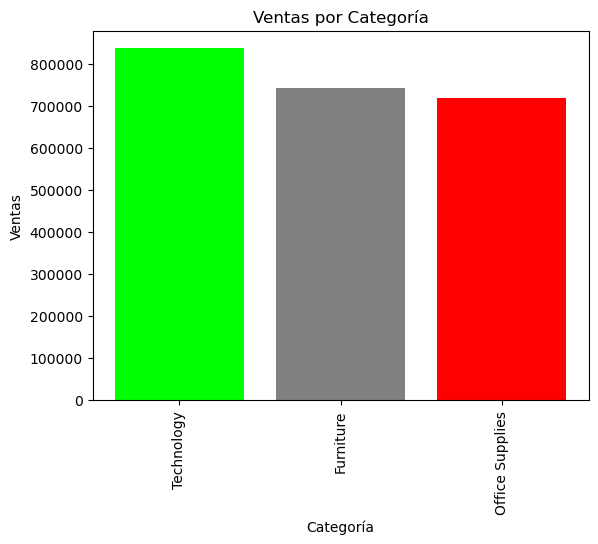

In [100]:
import matplotlib.pyplot as plt

# Ordenar los datos de mayor a menor según las ventas
category_info = category_info.sort_values(by=['Sales'], ascending=False)

# Crear la figura y el eje
fig, ax = plt.subplots()

# Crear los gráficos de barras apiladas
ax.bar(category_info['Category'], category_info['Sales'], color=['#00FF00','#808080', '#FF0000'])

# Establecer el título del gráfico y los títulos de los ejes
ax.set_title('Ventas por Categoría')
ax.set_xlabel('Categoría')
ax.set_ylabel('Ventas')

# Rotar las etiquetas del eje x para que se lean mejor
plt.xticks(rotation=90)

# Mostrar el gráfico
plt.show()


### Las categorias anteriores tienen un nivel de ventas muy parecido, lo que hace areas a observar para tomar decisiones de venta

- La categoria de **Tecnologia** tiene un nivel de ventas de **836,154.03**
- La categoria de **Muebles** tiene un nivel de ventas de **741,999.79**
- La categoria de **Material de oficina** tiene un nivel de ventas de **719,047.03**

Si nos metemos al analisis de manera mas profunda, podemos analizar por subcategorias dentro de nuestras categorias para poder observar cuales subcategorias son las que representan mayor nivel de ventas

In [103]:
df['Sub-Category'].nunique()

17

In [106]:
sub_category_info = df.groupby("Sub-Category").sum().reset_index()
sub_category_info

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Accessories,3928080,44468434,167380.3180,2976,60.80,41936.6357
1,Appliances,2407754,25250538,107532.1610,1729,77.60,18138.0054
2,Art,3920109,43329658,27118.7920,3000,59.60,6527.7870
3,Binders,7633935,83626398,203412.7330,5974,567.00,30221.7633
4,Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560
5,Chairs,3121503,34936229,328449.1030,2356,105.00,26590.1663
6,Copiers,355661,3873477,149528.0300,234,11.00,55617.8249
7,Envelopes,1207903,13325731,16476.4020,906,20.40,6964.1767
8,Fasteners,1017287,12506063,3024.2800,914,17.80,949.5182
9,Furnishings,4842624,51880430,91705.1640,3563,132.40,13059.1436


In [112]:
sub_category_info[["Sub-Category"   ,"Sales"]].sort_values(by = ['Sales'] , ascending = False).head(15)

,Sub-Category,Sales
13,Phones,330007.0540
5,Chairs,328449.1030
14,Storage,223843.6080
16,Tables,206965.5320
3,Binders,203412.7330
11,Machines,189238.6310
0,Accessories,167380.3180
6,Copiers,149528.0300
4,Bookcases,114879.9963
1,Appliances,107532.1610


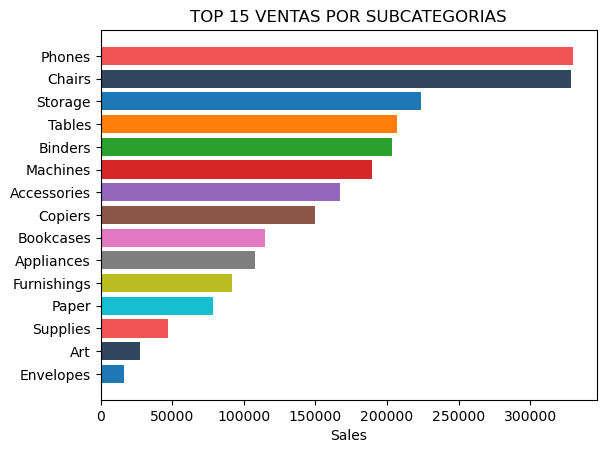

In [141]:
sub_category_info_top15_sales = sub_category_info.sort_values(by=['Sales'], ascending=False).head(15)
Viz_Bar(sub_category_info_top15_sales, 'Sub-Category', 'Sales', 'TOP 15 VENTAS POR SUBCATEGORIAS', 'horizontal', False)



### Analisis de las ventas por Subcategoria

Podemos observar en la grafica anterior las 15 subcategorias con mayores niveles de ventas de nuestra tienda.

Al segmentar e ir mas profundo en nuestra investigacion sobre los productos que vendemos, podemos tomar una mejor decision sobre donde enfocar nuestros esfuerzos para que pueda existir una tasa de crecimiento y expansion sostenida.

In [115]:
sub_category_info[["Sub-Category"   ,"Profit"]].sort_values(by=["Profit"] , ascending = False).head(15)

,Sub-Category,Profit
6,Copiers,55617.8249
13,Phones,44515.7306
0,Accessories,41936.6357
12,Paper,34053.5693
3,Binders,30221.7633
5,Chairs,26590.1663
14,Storage,21278.8264
1,Appliances,18138.0054
9,Furnishings,13059.1436
7,Envelopes,6964.1767


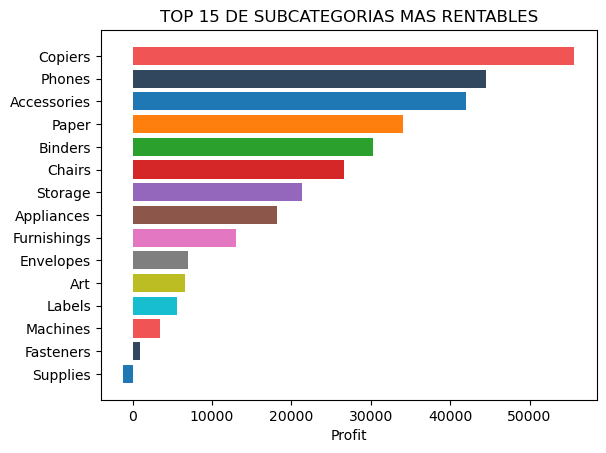

In [140]:
sub_category_info_top15 = sub_category_info.sort_values(by=['Profit'], ascending=False).head(15)
Viz_Bar(sub_category_info_top15, 'Sub-Category', 'Profit', 'TOP 15 DE SUBCATEGORIAS MAS RENTABLES', 'horizontal', False)


### Analisis por nivel de ganancias de las subcategorias

Aqui es importante observar un producto estrella que es el **Telefono** podemos observar en nuestra grafica anterior de nivel de ventas y el celular era el #1 en ventas por subcategoria y al observar la grafica podemos observar que es el #2 en cuanto a nivel de ganancias lo que lo convierte en el producto más importante pues se vende mucho y conlleva una gran parte de nuestros ingresos totales

## Subcategorias que generan perdidas

In [120]:
sub_category_info[sub_category_info['Profit']<=0]

,Sub-Category,Row ID,Postal Code,Sales,Quantity,Discount,Profit
4,Bookcases,1156535,12771539,114879.9963,868,48.14,-3472.5560
15,Supplies,993554,10633558,46673.5380,647,14.60,-1189.0995
16,Tables,1572664,18607828,206965.5320,1241,83.35,-17725.4811


### Analisis de mercado por Ciudades

In [121]:
#Identificamos cuantas ciudades tenemos para nuestro ejemplo
df['City'].nunique()

531

In [122]:
# Generamos un dataframe para poder observar nuestras variables
cities_info = df.groupby("City").sum().reset_index()
cities_info

,City,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Aberdeen,9261,57401,25.500,3,0.0,6.6300
1,Abilene,6990,79605,1.392,2,0.8,-3.7584
2,Akron,97234,930552,2729.986,65,7.5,-186.6356
3,Albuquerque,67175,1219470,2220.160,65,0.8,634.0881
4,Alexandria,47898,356864,5519.570,84,0.0,318.6183
...,...,...,...,...,...,...,...
526,Woonsocket,19448,11580,195.550,15,0.0,78.6791
527,Yonkers,74122,160515,7657.666,57,1.0,2767.7557
528,York,23392,87015,817.978,19,2.1,-102.1692
529,Yucaipa,3348,92399,50.800,5,0.0,13.2080


## Ciudades que tienen el mayor nivel de Ventas

In [124]:
cities_info[['City' ,'Sales']].sort_values(by = ["Sales"] ,ascending = False).head(10)

,City,Sales
329,New York City,256368.1610
266,Los Angeles,175851.3410
452,Seattle,119540.7420
438,San Francisco,112669.0920
374,Philadelphia,109077.0130
207,Houston,64504.7604
80,Chicago,48539.5410
437,San Diego,47521.0290
216,Jacksonville,44713.1830
464,Springfield,43054.3420


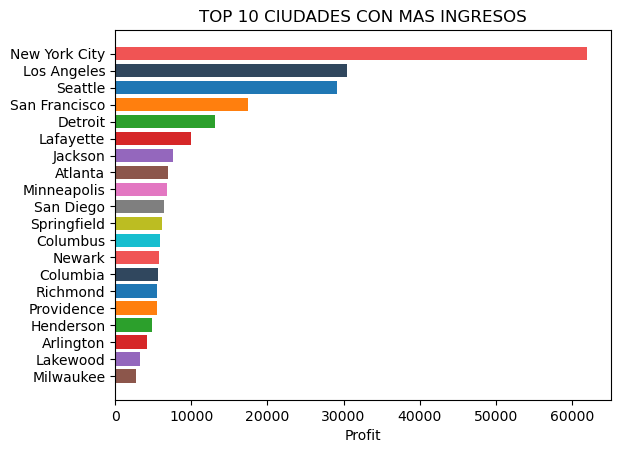

In [138]:
Viz_Bar(cities_info[['City' ,'Profit']].sort_values(by = ["Profit"] ,ascending = False) , 'City' , 'Profit' ,'TOP 10 CIUDADES CON MAS INGRESOS' , 'horizontal',False)

Es importante observar las 10 ciudades mas importantes de nuestra tienda, para poder concentrar nuestros esfuerzos a ciertos lugares y podamos maximizar nuestras ganancias

Las ciudades mas importantes en funcion de las ventas segun nuestra base de datos es:

- New York City
- Los Angeles
- Seattle

In [130]:
cities_info[cities_info['Profit']<=0].sort_values(by = ['Profit'])

,City,Row ID,Postal Code,Sales,Quantity,Discount,Profit
374,Philadelphia,2531454,10275302,109077.0130,1981,175.50,-13837.7674
207,Houston,2017125,29052387,64504.7604,1466,143.14,-10153.5485
434,San Antonio,263170,4614213,21843.5280,247,22.60,-7299.0502
241,Lancaster,257562,1980720,9891.4640,171,14.50,-7239.0684
80,Chicago,1643465,19037248,48539.5410,1132,120.50,-6654.5688
...,...,...,...,...,...,...,...
354,Ormond Beach,2121,32174,2.8080,3,0.70,-1.9656
370,Pensacola,4879,32503,2.2140,3,0.70,-1.4760
140,Elyria,8716,44035,1.8240,1,0.70,-1.3984
7,Altoona,7585,33204,20.4510,9,0.90,-1.1835


Por otro lado podemos observar las ciudades que menos ganancias tienen o en este caso donde se presentan pérdidas, en nuestro dataframe podemos observar 5 ciudades que nos estan provocando perdidas constantemente

- Philadelphia
- Houston
- San Antonio
- Lancaster
- Chicago

De seguir vendiendo o teniendo actividad de negocio en estas ciudades, es afectar la capitalizacion y la contabilidad de nuestra empresa.

    Aunque hay que recalcar que existen 111 ciudades que siguen afectando los ingresos del negocio.

# Analisis por Estado

Si queremos hacer el analisis de manera mas agregada y general nos podemos enfocar en cada uno de los 50 estados del Pais pues si encontramos un patron de perdidas de un estado o si vemos que un estado representa la mayoria de las perdidas podemos enfocarnos en otros estados que nos permita expandirnos en todas las ciudades.

Esto podria ser por una cuestion de amor a la marca o existe cierta costumbre a consumir en la tienda

In [131]:
df['State'].nunique()

49

In [132]:
states_info = df.groupby('State').sum().reset_index()
states_info.head()

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Alabama,243876,2195669,19510.6400,256,0.0,5786.8253
1,Arizona,1019876,19102126,35282.0010,862,68.0,-3427.9246
2,Arkansas,304575,4339309,11678.1300,240,0.0,4008.6871
3,California,10137449,184382639,457687.6315,7667,145.6,76381.3871
4,Colorado,797002,14613828,32108.1180,693,57.6,-6527.8579


In [134]:
states_info = states_info.sort_values(by = ['Sales'] , ascending = False)
states_info.head(15)

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit
3,California,10137449,184382639,457687.6315,7667,145.60,76381.3871
30,New York,5452096,11835721,310876.2710,4224,62.40,74038.5486
41,Texas,5085541,75747693,170188.0458,3724,364.64,-25729.3563
45,Washington,2584458,49661687,138641.2700,1883,32.40,33402.6517
36,Pennsylvania,2768523,11190565,116511.9140,2153,192.90,-15559.9603
8,Florida,1958255,12640225,89473.7080,1379,114.65,-3399.3017
11,Illinois,2571481,29873772,80166.1010,1845,191.90,-12607.8870
33,Ohio,2355994,20579836,78258.1360,1759,152.40,-16971.3766
20,Michigan,1200167,12356103,76269.6140,946,1.80,24463.1876
44,Virginia,1218137,5124335,70636.7200,893,0.00,18597.9504


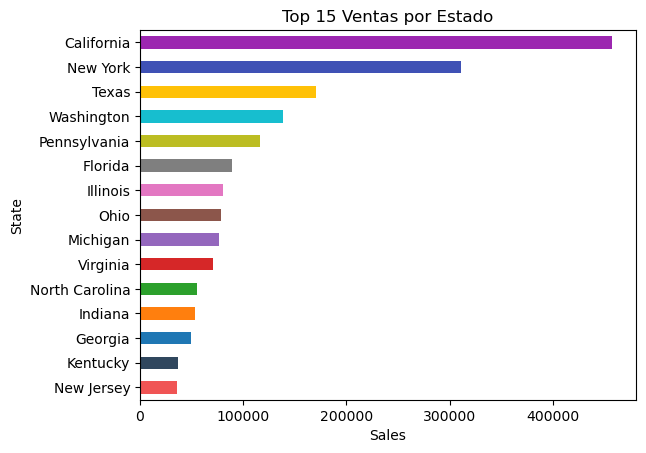

In [137]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Definir la lista de colores
colors = ['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FFC107', '#3F51B5', '#9C27B0']

# Obtener los 15 estados con mayores ventas
top_states = df.groupby('State')['Sales'].sum().sort_values(ascending=True).tail(15)

# Crear el gráfico de barras horizontales
ax = top_states.plot.barh(color=colors)

# Definir los títulos y etiquetas
ax.set_title('Top 15 Ventas por Estado')
ax.set_xlabel('Sales')
ax.set_ylabel('State')

# Mostrar el gráfico
plt.show()


Podemos observar que los estados mas importantes son California, New York y Texas

Cabe recalcar que en nuestro analisis anterior pudimos observar que los Angeles era una de las ciudades con mayores ingresos lo que es congruente con la grafica anterior que muestra que California es el estado mas importantes en cuestion del nivel de ventas

In [145]:
#Estados con el mayor nivel de Ingresos
states_info = states_info.sort_values(by = ['Profit'] , ascending = False)
states_info.head(15)

,State,Row ID,Postal Code,Sales,Quantity,Discount,Profit
3,California,10137449,184382639,457687.6315,7667,145.6,76381.3871
30,New York,5452096,11835721,310876.2710,4224,62.4,74038.5486
45,Washington,2584458,49661687,138641.2700,1883,32.4,33402.6517
20,Michigan,1200167,12356103,76269.6140,946,1.8,24463.1876
44,Virginia,1218137,5124335,70636.7200,893,0.0,18597.9504
12,Indiana,728770,6991602,53555.3600,578,0.0,18382.9363
9,Georgia,883590,5685480,49095.8400,705,0.0,16250.0433
15,Kentucky,698921,5725336,36591.7500,523,0.0,11199.6966
21,Minnesota,316645,4932224,29863.1500,331,0.0,10823.1874
6,Delaware,504370,1896504,27451.0690,367,0.6,9977.3748


Volvemos a observar la congruencia que existe entre los estados con mayor nivel de ventas y mayor nivel de ingresos que en este caso concuerda los primeros 2 estados **California y New York**

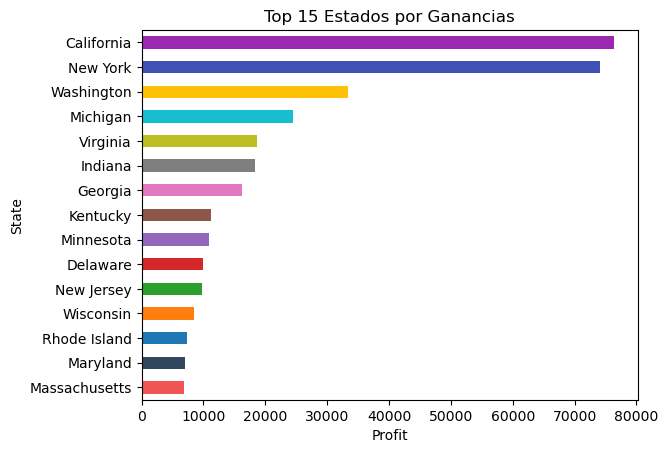

In [147]:
# Importar las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Definir la lista de colores
colors = ['#F05454', '#30475E', '#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf', '#FFC107', '#3F51B5', '#9C27B0']

# Obtener los 15 estados con mayores ganancias
top_states = df.groupby('State')['Profit'].sum().sort_values(ascending=True).tail(15)

# Crear el gráfico de barras horizontales
ax = top_states.plot.barh(color=colors)

# Definir los títulos y etiquetas
ax.set_title('Top 15 Estados por Ganancias')
ax.set_xlabel('Profit')
ax.set_ylabel('State')

# Mostrar el gráfico
plt.show()


## Analisis por Region del Pais

In [148]:
regions_info  = df.groupby('Region').sum().reset_index()
regions_info 

,Region,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Central,11685963,151786150,501239.8908,8780,558.34,39706.3625
1,East,14073919,50171698,678781.2400,10618,414.00,91522.7800
2,South,8213295,55875052,391721.9050,6209,238.55,46749.4303
3,West,15971838,293739752,725457.8245,12266,350.20,108418.4489


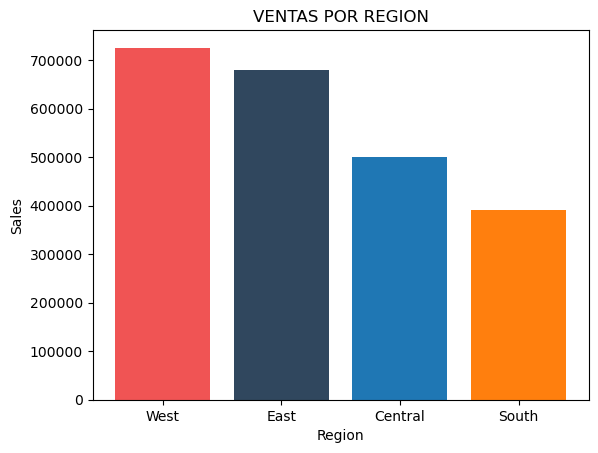

In [150]:
Viz_Bar(regions_info.sort_values(by = ['Sales'] , ascending = False) , 'Region' , 'Sales' ,'VENTAS POR REGION')

Se escogieron las regiones del pais como una forma de realizar un analisis macroeconomico de las zonas de Estados Unidos con el fin de observar cual de las regiones tienen mayor nivel de ventas

Es importante observa que la region oeste es la region con mayor nivel de ventas

In [151]:
regions_info [['Region'  , 'Profit']]

,Region,Profit
0,Central,39706.3625
1,East,91522.7800
2,South,46749.4303
3,West,108418.4489


A su vez, si observamos el nivel de ganancias de todas las zonas, la region del oeste es la que tiene el mayor nivel de ganancias. Y por otro lado el segundo lugar que es el este tambien tiene el mayor nivel de ganancias.

Las decisiones deberian de estar enfocadas en estas zonas comerciales

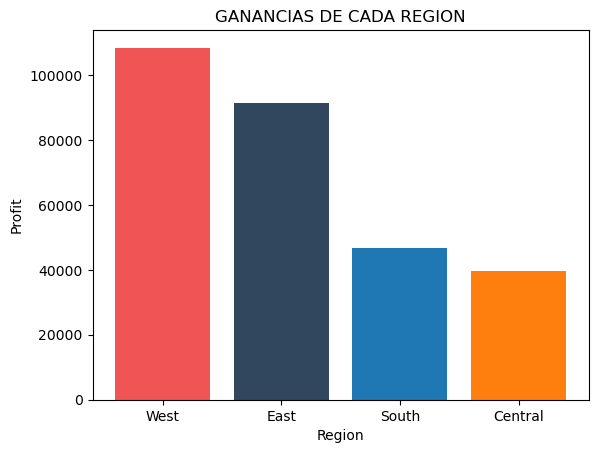

In [152]:
Viz_Bar(regions_info.sort_values(by=['Profit'] , ascending = False) , 'Region' , 'Profit' ,'GANANCIAS DE CADA REGION')

# Analisis por Cliente

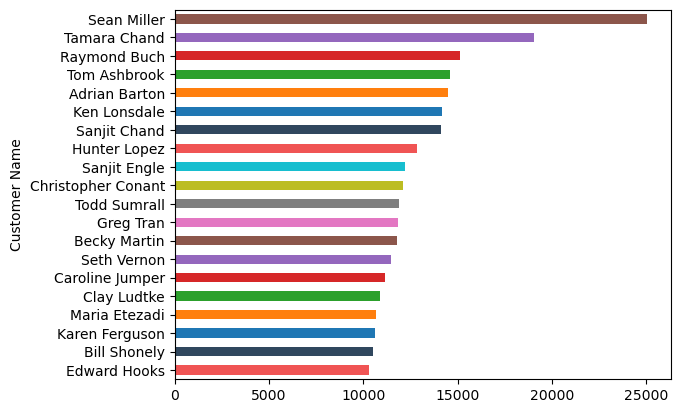

In [155]:
colors = color=['#F05454','#30475E' ,'#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 
df.groupby('Customer Name')['Sales'].sum().sort_values(ascending=True).tail(20).plot.barh(color=colors);

El cliente mas importante de nuestra base de datos es Sean Miller y es el que tiene mayor nivel de ventas

In [171]:
customer_info = df.groupby('Customer Name').sum().reset_index()
customer_info_sorted = customer_info.sort_values(by='Customer Name', ascending=True)
customer_info_sorted

,Customer Name,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Aaron Bergman,40717,516566,886.156,13,0.40,129.3465
1,Aaron Hawkins,74651,565428,1744.700,54,1.00,365.2152
2,Aaron Smayling,35334,558319,3050.692,48,3.55,-253.5746
3,Adam Bellavance,76124,762372,7755.620,56,0.80,2054.5885
4,Adam Hart,136946,818743,3250.337,75,2.70,281.1890
...,...,...,...,...,...,...,...
788,Xylona Preis,156468,1781278,2374.658,100,1.30,621.2300
789,Yana Sorensen,70256,812394,6720.444,58,0.60,1778.2923
790,Yoseph Carroll,28839,461734,5454.350,31,0.60,1305.6290
791,Zuschuss Carroll,92429,2318355,8025.707,105,7.90,-1032.1490


# Analisis por segmentos de la tienda

In [173]:
segments_info = df.groupby("Segment").sum().reset_index()
segments_info

,Segment,Row ID,Postal Code,Sales,Quantity,Discount,Profit
0,Consumer,25581329,288878609,1.161401e+06,19521,820.91,134119.2092
1,Corporate,15504734,164536330,7.061464e+05,11608,477.85,91979.1340
2,Home Office,8858952,98157713,4.296531e+05,6744,262.33,60298.6785


In [174]:
segments_info[['Segment' , 'Sales']]

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


In [175]:
segments_info[['Segment' , 'Sales']]

,Segment,Sales
0,Consumer,1.161401e+06
1,Corporate,7.061464e+05
2,Home Office,4.296531e+05


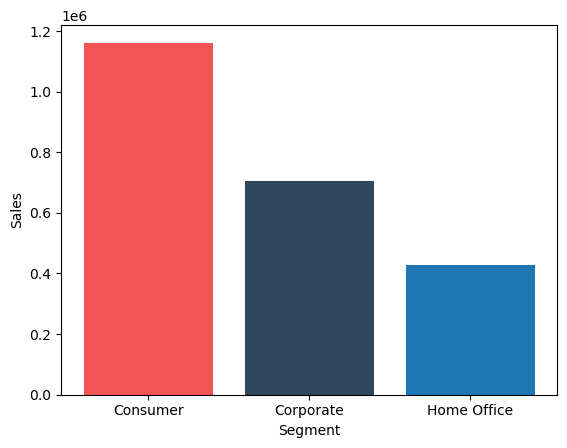

In [176]:
Viz_Bar(segments_info , 'Segment' ,'Sales')

# Analisis por ganancias de segmento

In [177]:
segments_info[['Segment' , 'Profit']]

,Segment,Profit
0,Consumer,134119.2092
1,Corporate,91979.1340
2,Home Office,60298.6785


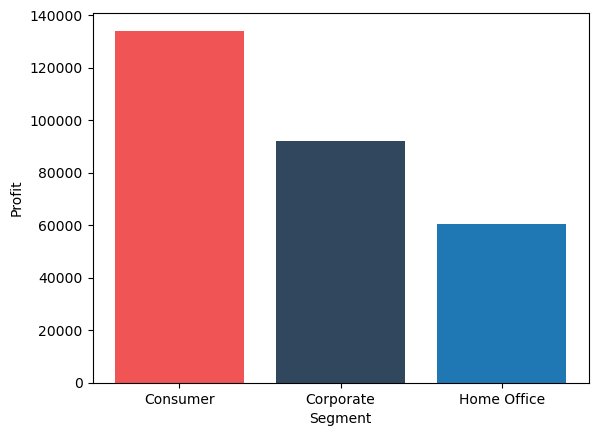

In [178]:
Viz_Bar(segments_info , 'Segment' ,'Profit')


Podemos observar que el segmento que tiene mayor nivel de ventas y mayores ingresos es el segmento de Consumer

Relacion entre la fecha de envio y los clientes

In [179]:
df['Ship Mode'].value_counts()

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

In [180]:
pivot_table = df.pivot_table(index = "Segment" ,columns="Ship Mode" ,values='Sales' , aggfunc = 'sum')
pivot_table

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,159168.9650,60596.359,231498.9496,710137.0714
Corporate,105858.4699,45121.323,146126.0388,409040.5351
Home Office,86400.9880,22645.443,81568.5810,239038.1365


Text(0, 0.5, 'Sales')

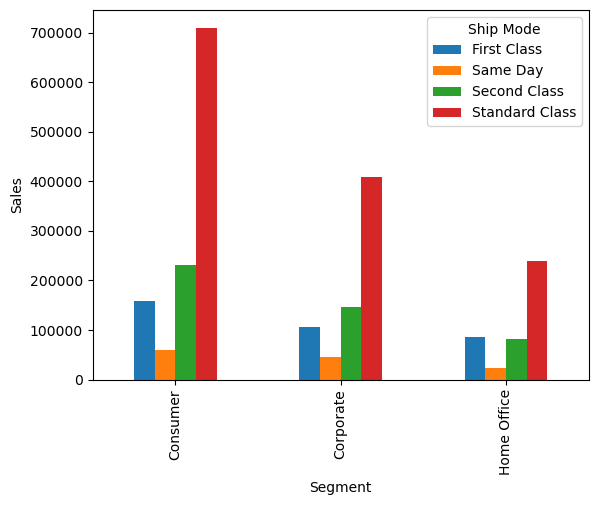

In [181]:
pivot_table.plot(kind = 'bar'  ,stacked = False)
plt.ylabel("Sales")

# Analisis de las ganancias con el Segmento y la fecha de envio

In [182]:
pivot_table2 = df.pivot_table(index = "Segment" ,columns="Ship Mode" ,values='Profit' , aggfunc = 'sum')
pivot_table2

Ship Mode,First Class,Same Day,Second Class,Standard Class
Segment,,,,
Consumer,21374.0436,9874.2054,24946.9112,77924.0490
Corporate,14464.4724,1818.1418,18225.7131,57470.8067
Home Office,13131.3239,4199.4117,14274.0111,28693.9318


Text(0, 0.5, 'Profit')

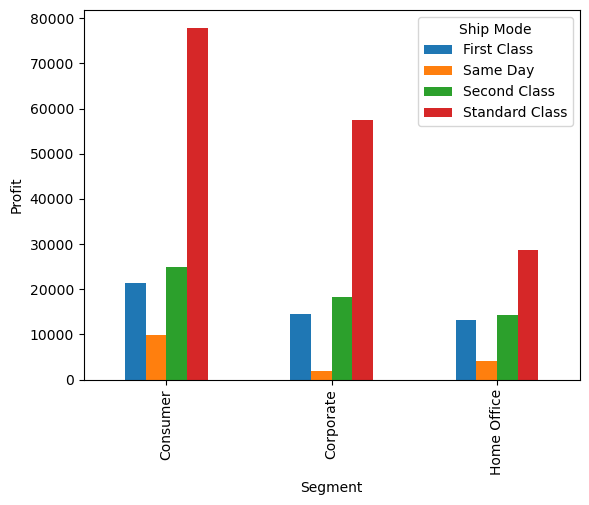

In [183]:
pivot_table2.plot(kind = 'bar'  ,stacked = False)
plt.ylabel("Profit")

Podemos concluir que la mayoría de las ventas y ganancias provienen de clientes que usan el modo de envío de clase estándar

# Analisis de Ventas e Ingresos a traves del tiempo

In [186]:
monthly_data = df.groupby(['Order Date'], as_index=False).sum()[['Order Date' , 'Sales' , 'Profit']]
monthly_data["Order Date"] = pd.to_datetime(monthly_data["Order Date"])
monthly_data.set_index("Order Date", inplace=True)
monthly_data = monthly_data.resample('M').sum() 
monthly_data.reset_index(inplace=True)
monthly_data["Month"] = [str(k.month)+'/'+str(k.year) for k in monthly_data['Order Date']]
monthly_data.drop("Order Date", axis=1, inplace=True)
monthly_data.rename(columns={"Sales":"Total Sales", "Profit":"Total Profit"}, inplace=True)
monthly_data


,Total Sales,Total Profit,Month
0,14236.8950,2450.1907,1/2014
1,4519.8920,862.3084,2/2014
2,55691.0090,498.7299,3/2014
3,28295.3450,3488.8352,4/2014
4,23648.2870,2738.7096,5/2014
5,34595.1276,4976.5244,6/2014
6,33946.3930,-841.4826,7/2014
7,27909.4685,5318.1050,8/2014
8,81777.3508,8328.0994,9/2014
9,31453.3930,3448.2573,10/2014


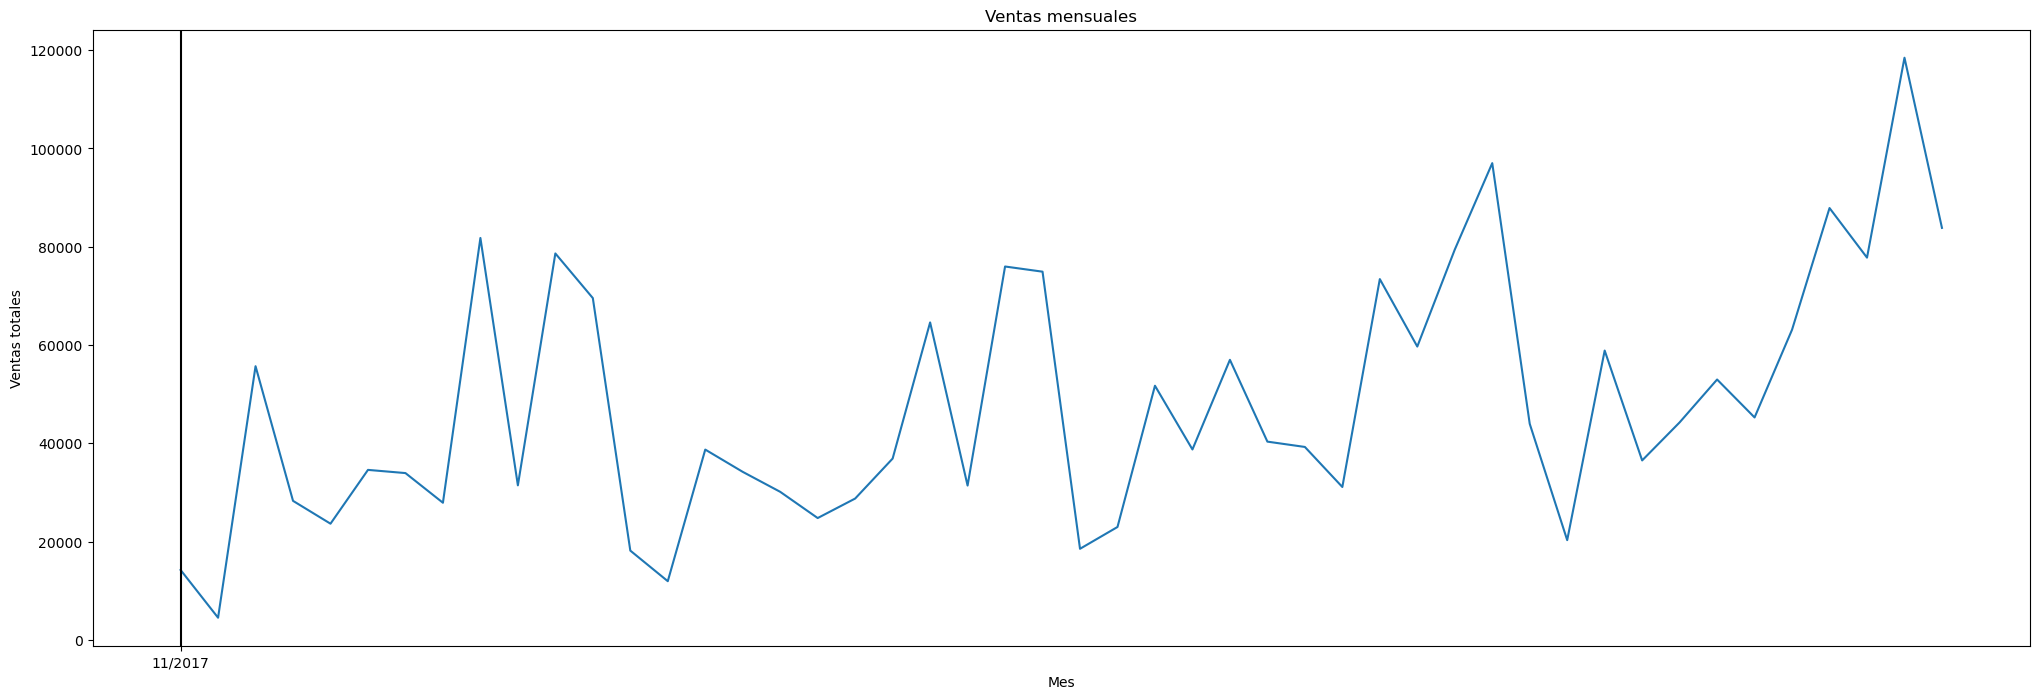

In [188]:
import matplotlib.pyplot as plt

# Plot
plt.figure(figsize=(25,8))
plt.plot(monthly_data['Total Sales'])
plt.axvline(monthly_data.sort_values(by="Total Sales", ascending=False).reset_index()['Month'][0], color='black')
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Ventas totales')
plt.show()


## Conclusiones

La gráfica muestra las ventas totales mensuales de la empresa a lo largo del tiempo, con una línea que representa el valor de las ventas cada mes. Además, la línea vertical negra indica el mes en que se registró la venta más alta en términos de valor.

A partir de esta gráfica, se pueden obtener varias conclusiones económicas importantes. Por ejemplo, se puede observar el patrón general de las ventas a lo largo del tiempo y si hay alguna tendencia en la dirección de las ventas. También se puede determinar qué meses son históricamente los más rentables para la empresa, lo que puede ayudar a tomar decisiones sobre la programación de promociones o descuentos en esos meses.

En general, esta gráfica puede ser útil para la planificación financiera y el análisis de tendencias, lo que puede ayudar a la empresa a tomar decisiones más informadas sobre la estrategia de ventas y el presupuesto.